<a href="https://colab.research.google.com/github/shreesha2304/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime
import datetime as dt
from geopy.distance import  great_circle

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#reading the dataset
df=pd.read_csv('/content/drive/MyDrive/almabetter/NYC Taxi Data.csv')

In [4]:
#examining the head of the dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
#checking the dimentions of the dataset
df.shape

(1458644, 11)

We can observe that the given dataset consists of 1458644 rows and 11 columns

In [ ]:
#finding out the total observations available in the dataset
df.size

16045084

In [ ]:
#finding out the basic information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
#checking the column names
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
#getting the numerical features corresponding to numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


In [ ]:
#checking for any null values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

From the information above, we observe that there are no null values in the dataset. Hence it is not required to clean the data or handle null values.

In [ ]:
#checking for duplicated rows
df.duplicated().sum()

0

There are no duplicate entries.

In [6]:
#converting the numerical data involving datetime into datettime format
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

# **CATEGORICAL FEATURES AND ANALYSIS RELATED TO THEM**

vendor_id and store_and_fwd_flag are the categorical variables in this dataset. We need to observe how do these variables relate to the total number of trips.

Text(0.5, 1.0, 'count vs vendor_id graph')

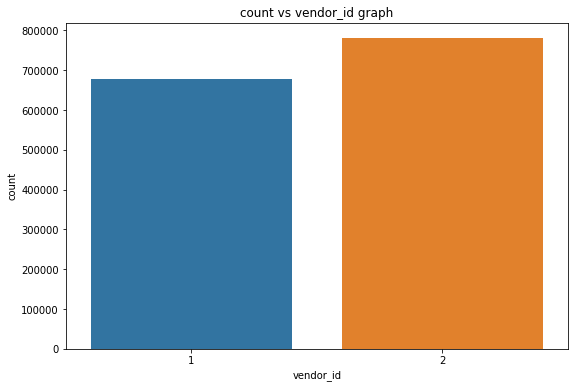

In [ ]:
#plotting vendor_id and count of trips
plt.figure(figsize=(9,6))
sns.countplot(data=df,x='vendor_id')
plt.title('count vs vendor_id graph')

From the plot, it is evident that among the two vendors, vendor with id 2 has taken more number of trips.

Text(0.5, 1.0, 'count vs store_and_fwd_flag graph')

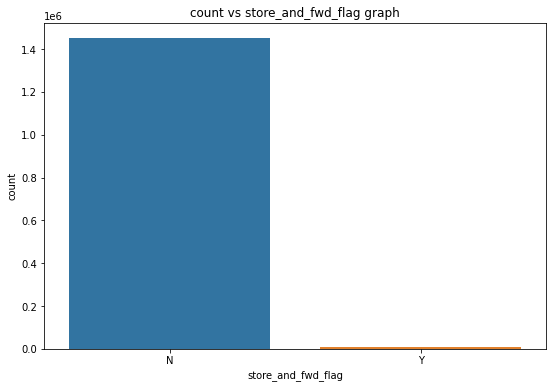

In [ ]:
#plotting store_and_fwd_flag and count plot
plt.figure(figsize=(9,6))
sns.countplot(data=df,x='store_and_fwd_flag')
plt.title('count vs store_and_fwd_flag graph')

From the plot, it can be seen that most of the trips were of store_and_fwd_flag NO type.

In the project, we need to find the relationship between dependent variable trip duration and other independent input variables. We need to find how the trip_duration is distributed and check it's skewness.

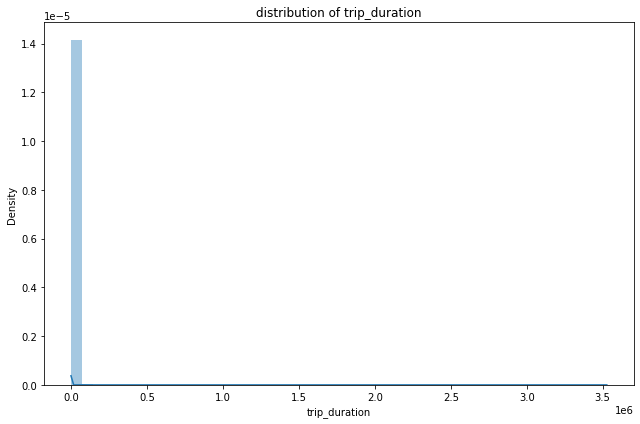

In [ ]:
#distribution of trip_duration
plt.figure(figsize=(9,6))
sns.distplot((df['trip_duration']))
plt.title('distribution of trip_duration')
plt.tight_layout()


In [ ]:
#skewness of trip_duration
df['trip_duration'].skew()

343.1639435917362

As we can see, the trip duration has a large positive skewness implying that most of the values are concentrated around the left tail. In order to reduce that, we can take the logarithm of trip_duration.

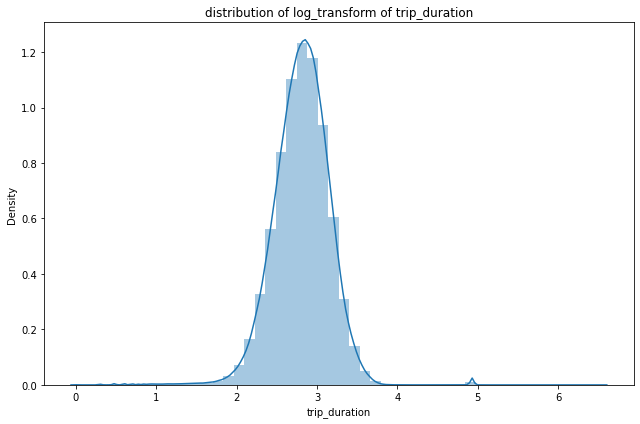

In [ ]:
#checking the distribution of log of trip_duration
plt.figure(figsize=(9,6))
sns.distplot(np.log10(df['trip_duration']))
plt.title('distribution of log_transform of trip_duration')
plt.tight_layout()

In [ ]:
#checking the skewness
np.log10(df['trip_duration']).skew()

-0.34070423044800024

From the plot and the skewness value, it can be treated as almost normally distributed.

In [ ]:
#checking the information regarding trip_duration
df['trip_duration'].describe()

count    15250.000000
mean       922.626557
std       2892.885406
min          2.000000
25%        395.000000
50%        658.000000
75%       1063.750000
max      86357.000000
Name: trip_duration, dtype: float64

Text(0.5, 1.0, 'trips and number of passengers')

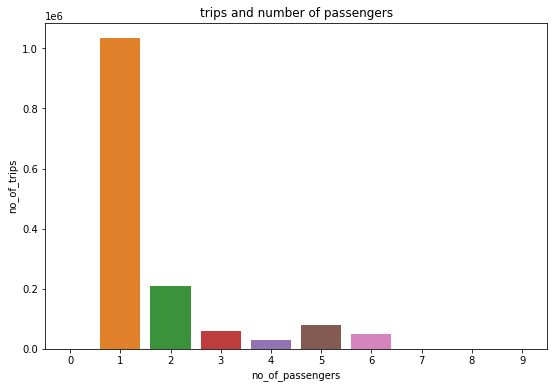

In [ ]:
#plotting the graph to understand the relationship between the no of passengers and no of trips
plt.figure(figsize=(9,6))
sns.countplot(data=df,x='passenger_count')
plt.xlabel('no_of_passengers')
plt.ylabel('no_of_trips')
plt.title('trips and number of passengers')


It can be observed that most people travel alone.

In [ ]:
#information regarding passenger_count
df['passenger_count'].describe()

count    1.458644e+06
mean     1.664530e+00
std      1.314242e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

We need to calculate the distance travelled in each trip. It can be obtained by making use of latitude and longitude provided in the dataset. By using the *Great Circle Method*, We can calculate the travel distance.

In [7]:
#calculate the distances
def calc_distance(row):
  coord_1 = (row['pickup_latitude'], row['pickup_longitude'])
  coord_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
  return great_circle(coord_1, coord_2).km

df['distance'] = df.apply(calc_distance, axis=1)

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,1.225082
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565


In [ ]:
#segregating the numerical featuers
num_features=['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','trip_duration']

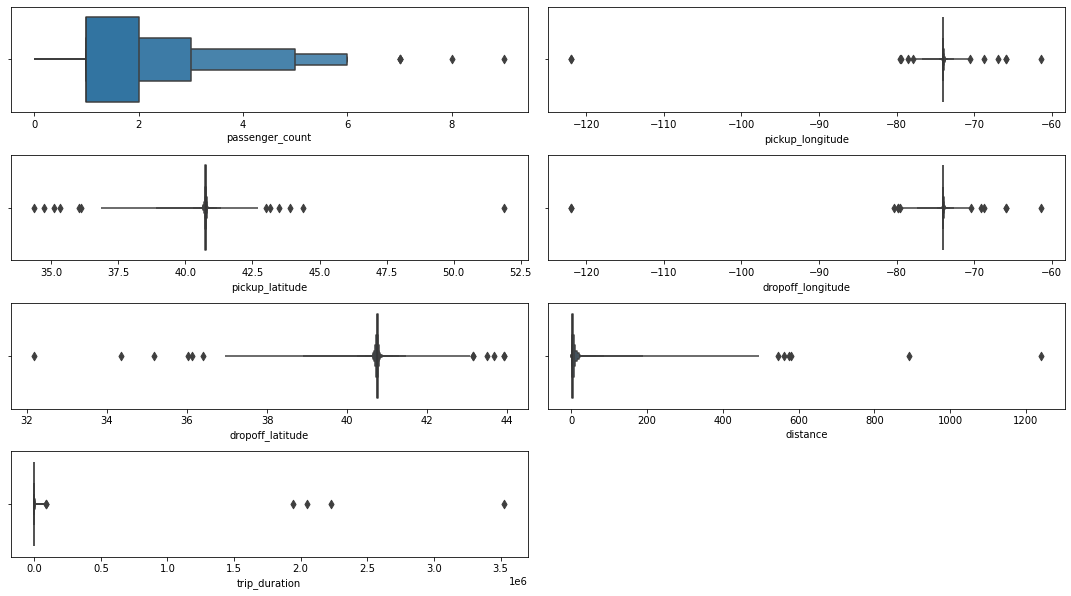

In [ ]:
#plotting boxenplots to find the distribution of these features
plt.figure(figsize=(15,10))
n =1
for i in num_features:
  plt.subplot(5,2,n)
  sns.boxenplot(df[i])
  n+=1
plt.tight_layout()


From the plots, it is obvious that all the variables have a lot of outliers which can affect the further analysis. 

In [ ]:
#check the duration of most number of trips
labels=['within 10 sec','between 10 sec and 1 min','between 1 min and 10 min','between 10 min and 1 hr','between 1 hr and 1 day','between 1 day and 2 day','more than 2 day'  ]
duration=pd.DataFrame(pd.cut(df.trip_duration, [1,10,60,600,3600,86400,172800,3530000],labels=labels )).reset_index().rename(columns={'index':'number'})
time_data=pd.DataFrame(duration.groupby('trip_duration').number.count().reset_index())


Text(0.5, 1.0, 'no_of_trips vs duration')

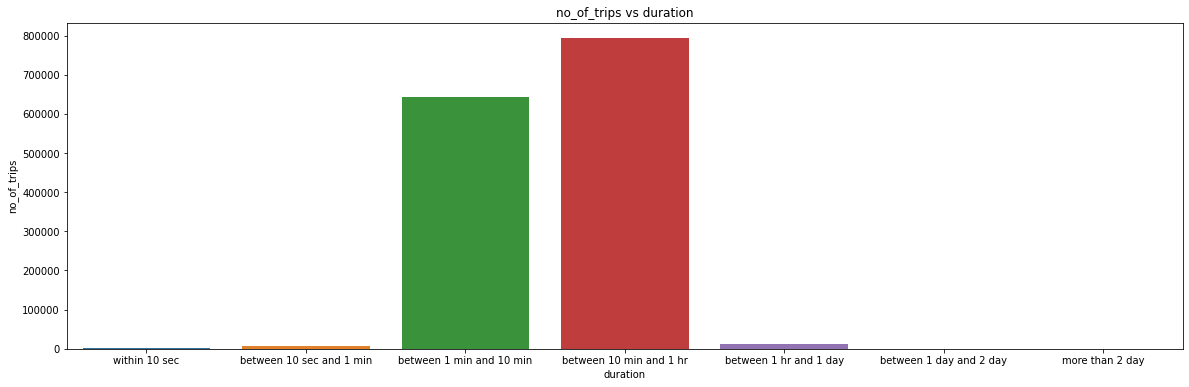

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(time_data['trip_duration'],time_data['number'])
plt.xlabel('duration')
plt.ylabel('no_of_trips')
plt.title('no_of_trips vs duration')

From the plot, it is inferred that most of the trips are within 1 min and 1 hr duration. There are only few trips exceeding or preceding these durations.

In [ ]:
print(df['pickup_datetime'].dt.year.unique())
print(df['dropoff_datetime'].dt.year.unique())

[2016]
[2016]


In [ ]:
print(df['pickup_datetime'].dt.month.unique())
print(df['dropoff_datetime'].dt.month.unique())

[3 6 1 4 5 2]
[3 6 1 4 5 2 7]


We need to remove outliers. For the sake of outlier removal, we use inter-quartile ranges.

In [8]:
#percentiles for distance
q1 = np.percentile(df['distance'],25)
print(q1)
q2 = np.percentile(df['distance'],50)
print(q2)
q3 = np.percentile(df['distance'],75)
print(q3)


1.2318383063623233
2.0937200906182802
3.8753428927314006


In [9]:
#defining iqr
iqr=q3 -q1
llimit=q1-(1.5*iqr)
ulimit=q3+(1.5*iqr)

print("lower limit for outlier  :",llimit)
print("Upper limit for outlier  :",ulimit)

lower limit for outlier  : -2.7334185731912926
Upper limit for outlier  : 7.8405997722850165


In [12]:
#Considering only those values falling between the necessary range
df=df[df['distance']>llimit]
df=df[df['distance']<ulimit]

In [10]:
#removal of outliers for trip_duration
q1 = np.percentile(df['trip_duration'],25)
print(q1)
q2 = np.percentile(df['trip_duration'],50)
print(q2)
q3 = np.percentile(df['trip_duration'],75)
print(q3)


397.0
662.0
1075.0


In [11]:
iqr=q3 -q1
llimit=q1-(1.5*iqr)
ulimit=q3+(1.5*iqr)
print("lower limit for outlier  :",llimit)
print("Upper limit for outlier  :",ulimit)

lower limit for outlier  : -620.0
Upper limit for outlier  : 2092.0


In [12]:
df=df[df['trip_duration']>llimit]
df=df[df['trip_duration']<ulimit]

In [13]:
#removing outliers from passenger_count as well
q1 = np.percentile(df['passenger_count'],25)
print(q1)
q2 = np.percentile(df['passenger_count'],50)
print(q2)
q3 = np.percentile(df['passenger_count'],75)
print(q3)

1.0
1.0
2.0


In [14]:
iqr=q3 -q1
llimit=q1-(1.5*iqr)
ulimit=q3+(1.5*iqr)
print("lower limit for outlier  :",llimit)
print("Upper limit for outlier  :",ulimit)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [15]:
df=df[df['passenger_count']>llimit]
df=df[df['passenger_count']<ulimit]

The entire New York City falls between  -74.03 and -73.75 longitudes and Latitudes are 40.63 N and 40.85 N. Any latitude or longitude other than these values are not to be considered.

In [16]:
#extracting the values falling within city limit
df = df[df['pickup_longitude'] <= -73.75]
df = df[df['pickup_longitude'] >= -74.03]
df = df[df['pickup_latitude'] <= 40.85]
df = df[df['pickup_latitude'] >= 40.63]
df = df[df['dropoff_longitude'] <= -73.75]
df = df[df['dropoff_longitude'] >= -74.03]
df = df[df['dropoff_latitude'] <= 40.85]
df = df[df['dropoff_latitude'] >= 40.63]

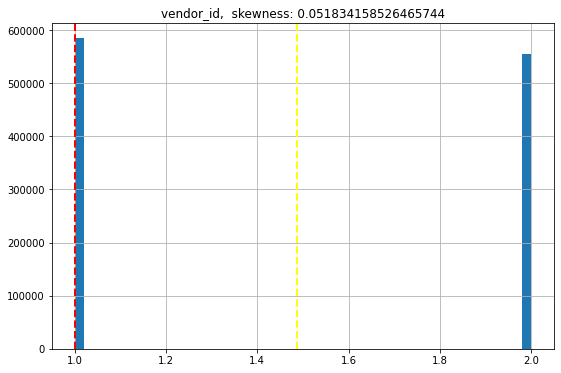

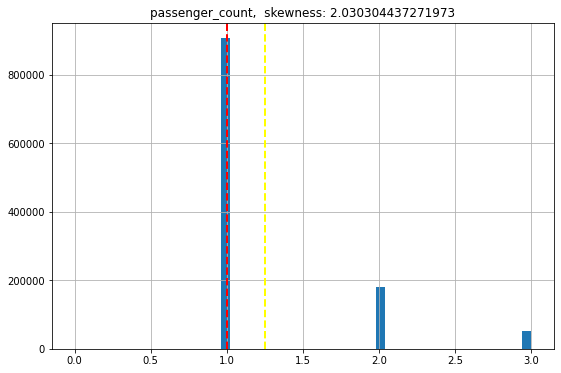

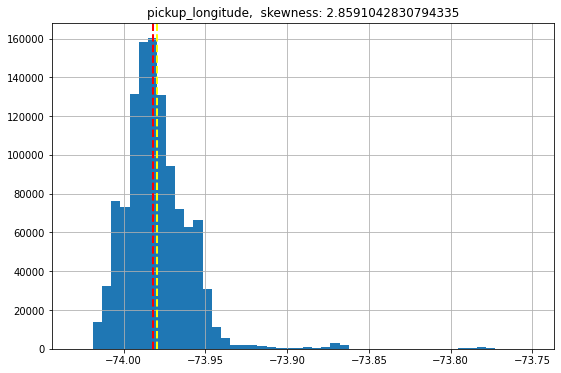

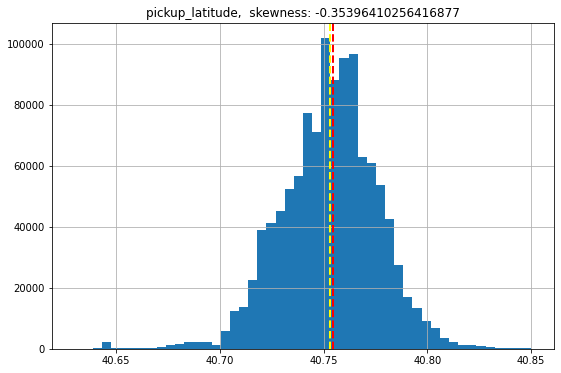

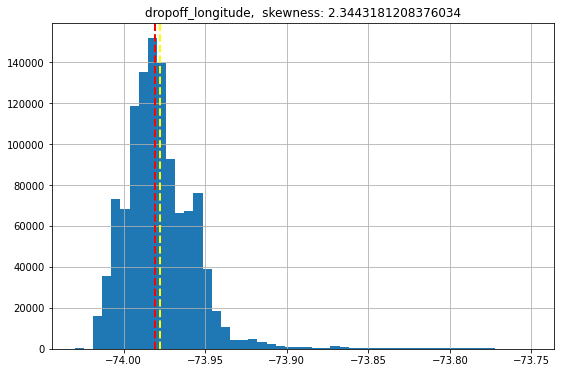

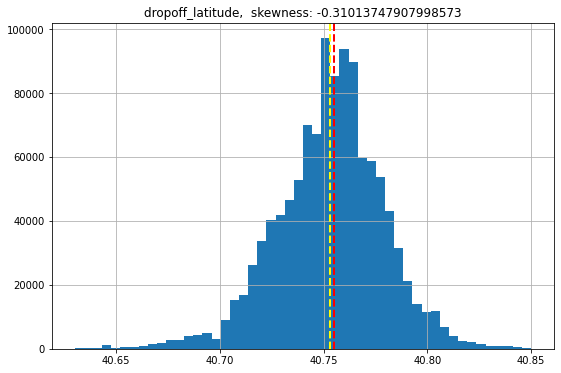

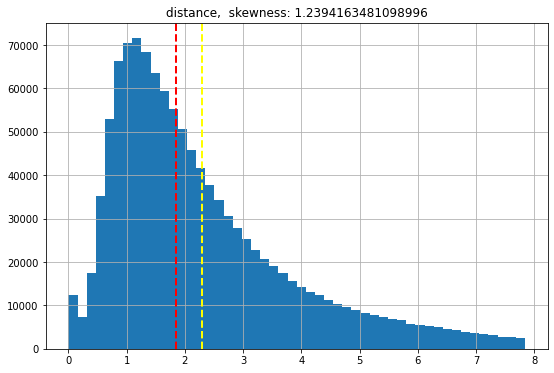

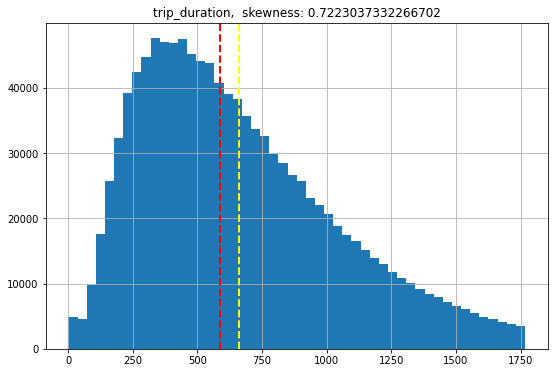

In [ ]:
#after removing outliers, we plot the histograms for all variables and find out their skewness as well.
for i in num_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[i]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='yellow', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='red', linestyle='dashed', linewidth=2)    
    ax.set_title(i+', '+ ' skewness: ' +str(df[i].skew()))
plt.show()

For the simplification of further processing, we extract tha datetime features separately.

In [17]:
df['month']=df['pickup_datetime'].dt.month
df['pickup_dayname']=df['pickup_datetime'].dt.day_name()
df['dropoff_dayname']=df['dropoff_datetime'].dt.day_name()
df['pickup_date']=df['pickup_datetime'].dt.day
df['pickup_hr']=df['pickup_datetime'].dt.hour
df['pickup_min']=df['pickup_datetime'].dt.minute
df['pickup_sec']=df['pickup_datetime'].dt.second


In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,month,pickup_dayname,dropoff_dayname,pickup_date,pickup_hr
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,3,Monday,Monday,14,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,6,Sunday,Sunday,12,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,1,Tuesday,Tuesday,19,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,4,Wednesday,Wednesday,6,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,3,Saturday,Saturday,26,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760,3.537560,4,Sunday,Sunday,17,18
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.049844,1,Sunday,Sunday,10,7
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,7.824617,4,Friday,Friday,22,6
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,1.092565,1,Tuesday,Tuesday,5,15


Text(0.5, 1.0, 'no_of_trips vs month')

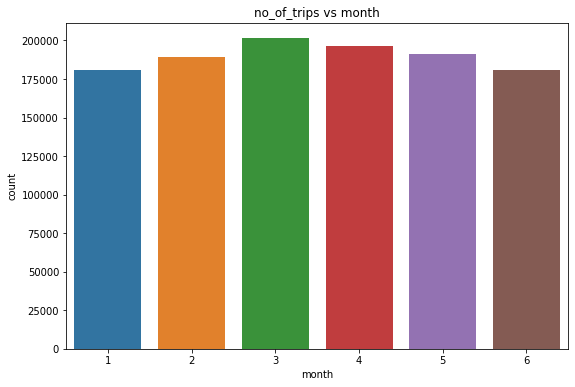

In [ ]:
#plotting the no of trips in different months
plt.figure(figsize=(9,6))
sns.countplot(x='month',data=df)
plt.title('no_of_trips vs month')

It is seen that most no of trips occurn in the month of March.

Text(0.5, 1.0, 'no_of_trips vs pickup_day')

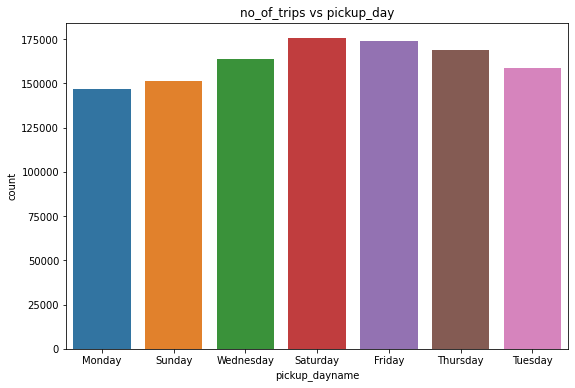

In [ ]:
#
plt.figure(figsize=(9,6))
sns.countplot(x='pickup_dayname',data=df)
plt.title('no_of_trips vs pickup_day')

It can be observed that most number of trips happen in Saturday, Followed by Friday.

In [ ]:
#observing the count of trips in different parts of month
labels=['first_week','second_week','third_week','fourth_week']
new=pd.DataFrame(pd.cut(df.date_of_month_pickup, [1,7,14,21,31],labels=labels )).reset_index().rename(columns={'index':'number'})
week=pd.DataFrame(new['date_of_month_pickup'].value_counts().reset_index())
week

,index,date_of_month_pickup
0,fourth_week,333430
1,second_week,270552
2,third_week,268391
3,first_week,230987


Text(0.5, 0, 'week_of_month')

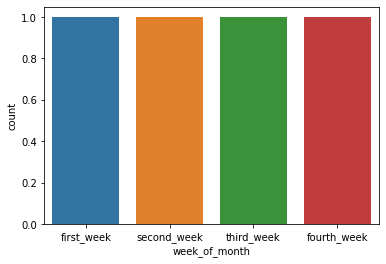

In [ ]:
sns.countplot(data=week,x='index')
plt.xlabel('week_of_month')

It is noted that most trips occur in the last week of month. But there is no significant difference between different weeks.

In [18]:
#defining a function to classify the days into weekdays and weekends
def weekday_or_end(x):
  if x in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
    return 'weekday'
  else:
    return 'weekend'


df['weekday_or_end']=df['pickup_dayname'].apply(weekday_or_end)


In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag,distance,month,pickup_dayname,dropoff_dayname,pickup_date,pickup_hr,weekday_or_end
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,0,1.498523,3,Monday,Monday,14,17,weekday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,0,1.805510,6,Sunday,Sunday,12,0,weekend
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,0,1.485501,4,Wednesday,Wednesday,6,19,weekday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,0,1.188590,3,Saturday,Saturday,26,13,weekend
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,0,5.714989,5,Saturday,Saturday,21,7,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,760,0,3.537560,4,Sunday,Sunday,17,18,weekend
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,655,0,6.049844,1,Sunday,Sunday,10,7,weekend
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,764,0,7.824617,4,Friday,Friday,22,6,weekday
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,373,0,1.092565,1,Tuesday,Tuesday,5,15,weekday


Text(0.5, 1.0, 'trip_duration_in_weekday or weekend')

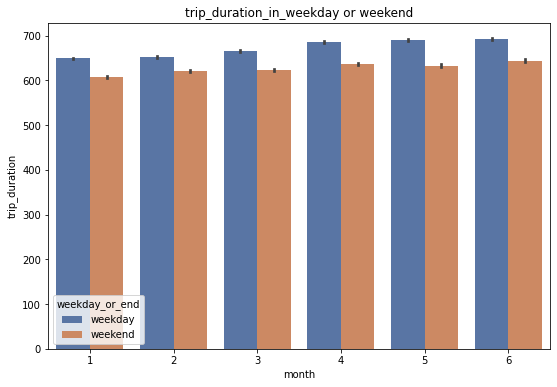

In [ ]:
#plotting the graph
plt.figure(figsize=(9,6))
sns.barplot(data=df,x='month',y='trip_duration',hue='weekday_or_end',palette="deep")
plt.title('trip_duration_in_weekday or weekend')

It is evident that in weekends the trip duration is less, which is applicable for all the months.

Text(0.5, 1.0, 'duration vs day')

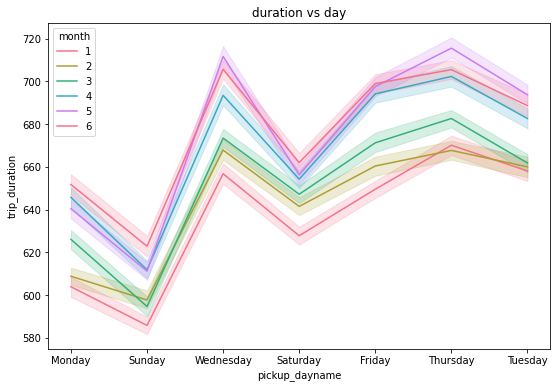

In [ ]:
#finding the relationship between duration vs day
plt.figure(figsize=(9,6))
sns.lineplot(x='pickup_dayname',y='trip_duration',hue='month',palette='husl',data=df)
plt.title('duration vs day')

The above graph justifies the previous observation. On saturdays and Sundays trip duration is less. In terms of month, Januray has the least duration and May has max duration.

In [19]:
#finding different parts of a day
def time_period(x):
  if x>=0 and x<6:
    return 'early_morning'
  if x>=6 and x<12:
    return 'morning'
  if x>=12 and x<16:
    return 'afternoon'
  if x>=16 and x<20:
    return 'evening'
  else:
    return 'night'


In [20]:
df['time_period']=df['pickup_hr'].apply(time_period)

Text(0.5, 1.0, 'duration in different parts of day')

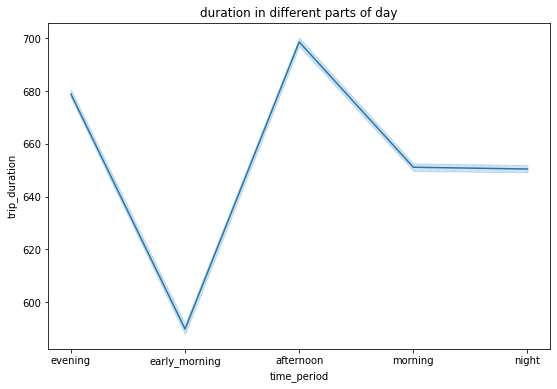

In [ ]:
#plotting the relationship between duration and different parts of day
plt.figure(figsize=(9,6))
sns.lineplot(x='time_period',y='trip_duration',data=df)
plt.title('duration in different parts of day')


It can be found that in the early morning trip duration is less, whereas in the afternoon, trip duration is the highest.

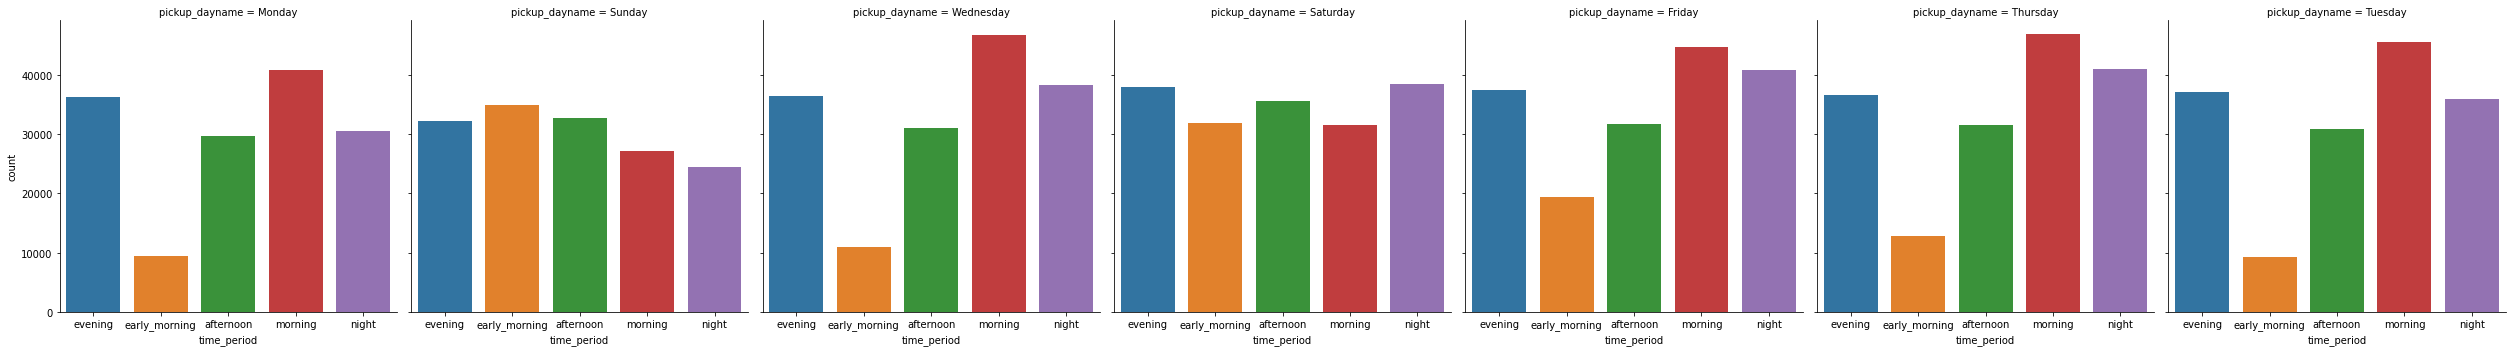

In [ ]:
#count vs different days and times
sns.catplot(data=df,kind='count',x='time_period',col='pickup_dayname');
plt.tight_layout()

In all other days except sunday, no of trips is lesser in early morning. 

Text(0.5, 1.0, 'distance in different hours')

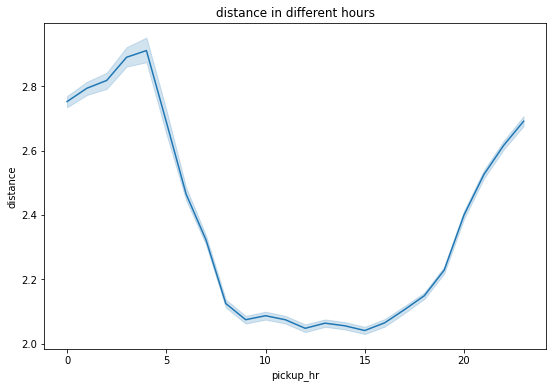

In [ ]:
#distance in diff hours vs hour
plt.figure(figsize=(9,6))
sns.lineplot(data=df,y='distance',x='pickup_hr')
plt.title('distance in different hours')

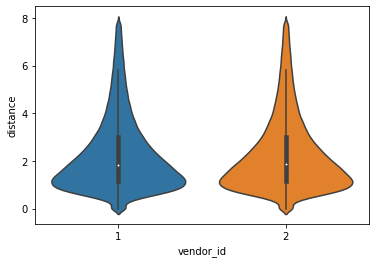

In [140]:
sns.violinplot(x='vendor_id', y='distance',data=df)
                  

In [24]:
#taking log of both trip_duration and distance
df['log_trip_duration']=np.log10(df['trip_duration'])
df['log_of_distance']=np.log10(df['distance'])

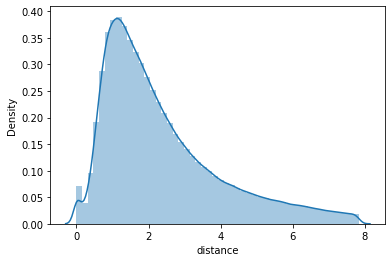

In [ ]:
sns.distplot(df['distance'])

In [1]:
df

NameError: ignored

In [21]:
#converting store_and_fwd_flag into numeric values using encoding
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map(dict(N=0,Y=1))

In [22]:
#getting dummy values for month and pickup_dayname
df = pd.get_dummies(df ,columns= ['month','pickup_dayname'],drop_first=True)


In [26]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'dropoff_dayname', 'pickup_date',
       'pickup_hr', 'pickup_min', 'pickup_sec', 'weekday_or_end',
       'time_period', 'log_trip_duration', 'log_of_distance', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'pickup_dayname_Monday',
       'pickup_dayname_Saturday', 'pickup_dayname_Sunday',
       'pickup_dayname_Thursday', 'pickup_dayname_Tuesday',
       'pickup_dayname_Wednesday'],
      dtype='object')

In [25]:
#dropping those columuns we have created just for analysis and not necessary to train the model
df.drop(['id','pickup_datetime','dropoff_datetime','trip_duration','dropoff_datetime','dropoff_dayname','weekday_or_end','log_of_distance','time_period'],axis=1,inplace=True)
# df.drop(['time_period'],axis=1,inplace=True)

In [26]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'distance', 'pickup_date', 'pickup_hr', 'pickup_min', 'pickup_sec',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'pickup_dayname_Monday', 'pickup_dayname_Saturday',
       'pickup_dayname_Sunday', 'pickup_dayname_Thursday',
       'pickup_dayname_Tuesday', 'pickup_dayname_Wednesday',
       'log_trip_duration'],
      dtype='object')

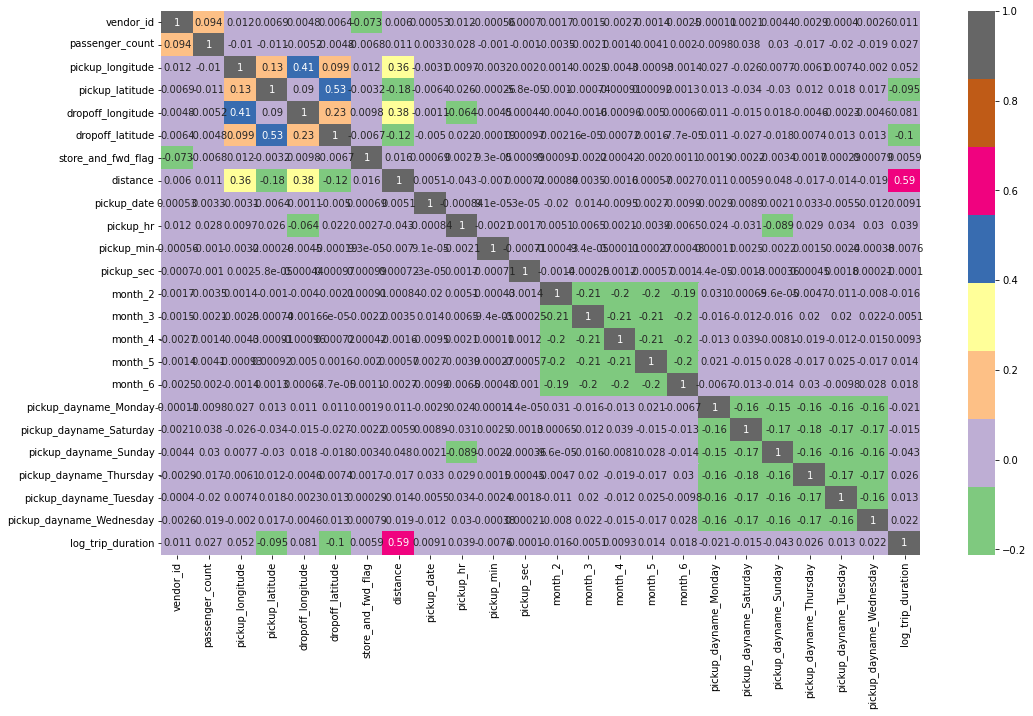

In [27]:
#finding out the correlation between different features 
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True,cmap='Accent')

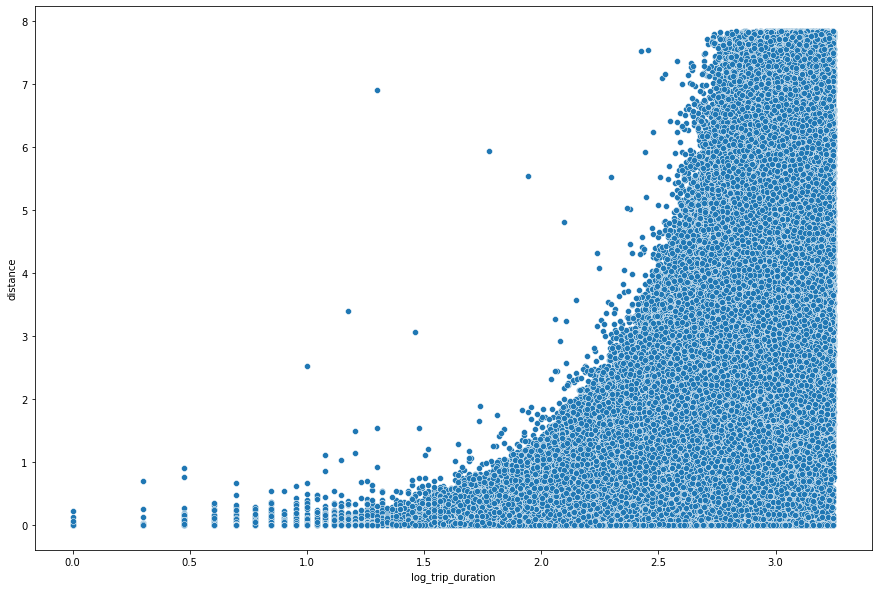

In [ ]:
#Bivariate analysis of distance and log of trip duration
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='log_trip_duration',y='distance',data=df)

In [ ]:
df

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_date,pickup_hr,...,month_3,month_4,month_5,month_6,pickup_dayname_Monday,pickup_dayname_Saturday,pickup_dayname_Sunday,pickup_dayname_Thursday,pickup_dayname_Tuesday,pickup_dayname_Wednesday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,1.498523,14,17,...,1,0,0,0,1,0,0,0,0,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,1.805510,12,0,...,0,0,0,1,0,0,1,0,0,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,1.485501,6,19,...,0,1,0,0,0,0,0,0,0,1
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,1.188590,26,13,...,1,0,0,0,0,1,0,0,0,0
5,2,6,-73.982857,40.742195,-73.992081,40.749184,0,1.098944,30,22,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,0,1.225082,8,13,...,0,1,0,0,0,0,0,0,0,0
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,0,6.049844,10,7,...,0,0,0,0,0,0,1,0,0,0
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,0,7.824617,22,6,...,0,1,0,0,0,0,0,0,0,0
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,0,1.092565,5,15,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'distance', 'pickup_date', 'pickup_hr', 'pickup_min', 'pickup_sec',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'pickup_dayname_Monday', 'pickup_dayname_Saturday',
       'pickup_dayname_Sunday', 'pickup_dayname_Thursday',
       'pickup_dayname_Tuesday', 'pickup_dayname_Wednesday',
       'log_trip_duration'],
      dtype='object')

We need to scale the values since the data involves values in different ranges. We can do that by Normalization.

In [28]:
#importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [29]:
#Choosing the input variables
X=df.loc[: ,['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'distance', 'pickup_date', 'pickup_hr', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'pickup_dayname_Monday',
       'pickup_dayname_Saturday', 'pickup_dayname_Sunday',
       'pickup_dayname_Thursday', 'pickup_dayname_Tuesday',
       'pickup_dayname_Wednesday','pickup_min','pickup_sec']]

In [30]:
#Assigning value of dependent variable to y
y=df.loc[: ,'log_trip_duration']

In [60]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_date,pickup_hr,...,month_5,month_6,pickup_dayname_Monday,pickup_dayname_Saturday,pickup_dayname_Sunday,pickup_dayname_Thursday,pickup_dayname_Tuesday,pickup_dayname_Wednesday,pickup_min,pickup_sec
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,1.498523,14,17,...,0,0,1,0,0,0,0,0,24,55
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,1.805510,12,0,...,0,1,0,0,1,0,0,0,43,35
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,1.485501,6,19,...,0,0,0,0,0,0,0,1,32,31
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,1.188590,26,13,...,0,0,0,1,0,0,0,0,30,55
7,2,1,-73.969276,40.797779,-73.922470,40.760559,0,5.714989,21,7,...,1,0,0,1,0,0,0,0,54,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458637,1,1,-73.975357,40.751705,-73.949478,40.776764,0,3.537560,17,18,...,0,0,0,0,1,0,0,0,48,16
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,0,6.049844,10,7,...,0,0,0,0,1,0,0,0,35,15
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,0,7.824617,22,6,...,0,0,0,0,0,0,0,0,57,41
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,0,1.092565,5,15,...,0,0,0,0,0,0,1,0,56,26


In [31]:
#splitting the data into training data and testing data
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train

array([[1.        , 0.33333333, 0.18824269, ..., 0.        , 0.15254237,
        0.03389831],
       [0.        , 0.66666667, 0.14926107, ..., 0.        , 0.01694915,
        0.40677966],
       [0.        , 0.33333333, 0.21416669, ..., 0.        , 0.03389831,
        0.79661017],
       ...,
       [0.        , 0.33333333, 0.15718305, ..., 0.        , 0.61016949,
        0.62711864],
       [0.        , 0.33333333, 0.18160461, ..., 0.        , 0.84745763,
        0.        ],
       [1.        , 0.33333333, 0.06569782, ..., 0.        , 0.16949153,
        0.96610169]])

In [34]:
#Shape of each data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((911613, 23), (227904, 23), (911613,), (227904,))

# **LINEAR REGRESSION**

In [ ]:
#importing the library
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [33]:
#Transforming the input variables
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#Fitting the values
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predcting y_train
y_pred_train=lr.predict(X_train)

In [ ]:
#Predciting y_test
y_pred_test=lr.predict(X_test)

In [ ]:
#Best parameters for Linear Regression
lr.get_params()


{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
#Coefficeints of the best-fit curve
lr.coef_


array([ 4.72956067e-03,  3.11854827e-02, -2.15602851e-01,  1.10963952e-01,
       -3.58210418e-01, -6.90731009e-02, -7.61985444e-03,  9.81924477e-01,
        4.35373347e-03,  5.74252195e-02,  3.90388083e-03,  3.95048288e-03,
        1.72950889e-02,  2.11113228e-02,  2.16605722e-02, -3.46888824e-02,
       -3.75527374e-02, -7.48190148e-02,  8.78247869e-03,  9.82563059e-04,
        8.41473826e-03, -2.98960457e-03, -2.72309457e-04])

In [40]:
#importing performance parameters
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error

In [ ]:
# for train data
lr_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , lr_train_mse)

lr_train_rmse = lr_train_mse**0.5

print("Train RMSE :" ,lr_train_rmse)

lr_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_adj = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_adj)

lr_train_mae  = mean_absolute_error((y_train), (y_pred_train))
print("Train Mae :" , lr_train_mae)

Train MSE : 0.04932023150653173
Train RMSE : 0.22208158750002607
Train R2 : 0.44311166200968777
Train Adjusted R2 :  0.4430976113445593
Train Mae : 0.16469601246374665


In [ ]:
#for test data
lr_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lr_test_mse)

lr_test_rmse = lr_test_mse**0.5

print("Test RMSE :" ,lr_test_rmse)

lr_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,lr_test_r2)

lr_test_r2_adj = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_adj)

lr_test_mae  = mean_absolute_error((y_test), (y_pred_test))
print("Test Mae :" , lr_test_mae)


Test MSE : 0.04971509056202676
Test RMSE : 0.22296881073824376
Test R2 : 0.4431515522785241
Test Adjusted R2 :  0.4430953493897335
Test Mae : 0.16494541501954402


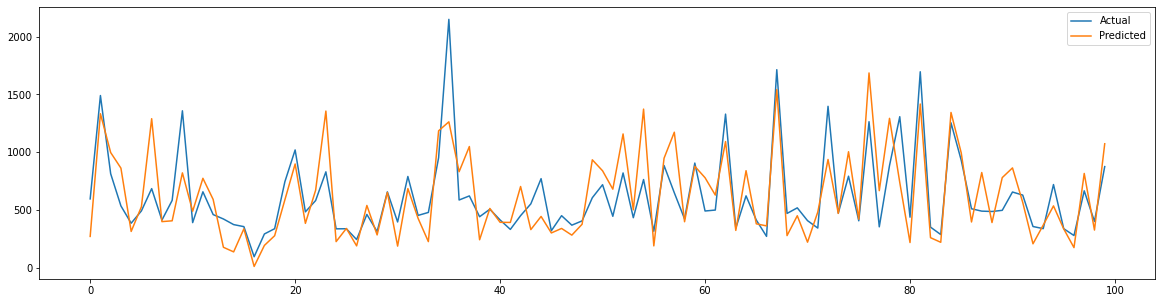

In [ ]:
#Plotting actual and predicted values for train data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_train)[:100])
plt.plot(np.array(10**(y_train))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

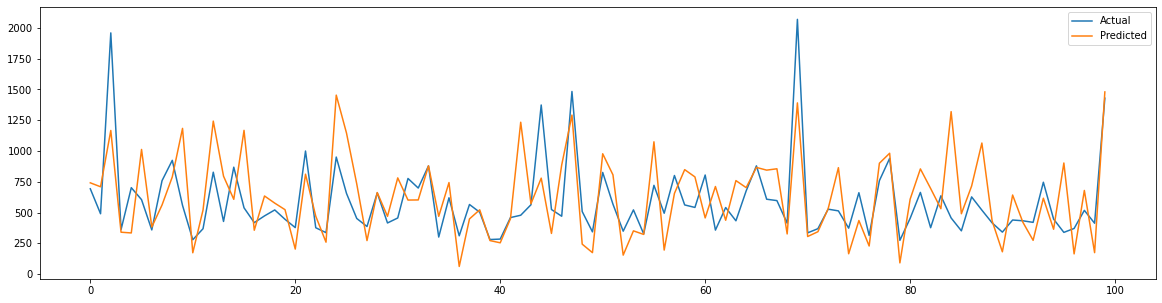

In [ ]:
#Plotting actual and predicted values for test data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_test)[:100])
plt.plot(np.array(10**(y_test))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

Text(0.5, 1.0, 'Error plot')

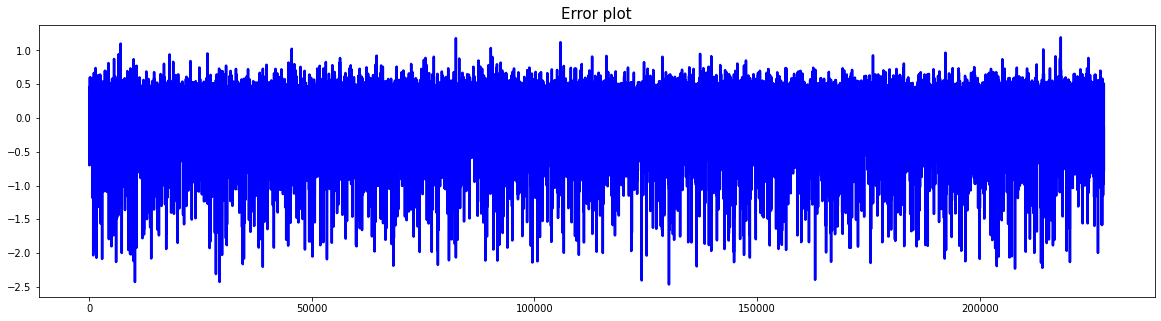

In [ ]:
#Plotting the error involved
plt.figure(figsize=(20,5))
c= [i for i in range(0, len(y_test))]

plt.plot(c, y_test-y_pred_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error plot', fontsize=15)



# **DECISION TREE**

In [36]:
#importing decisiontree regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In order to find the best parameters we need to perform cross validation.

In [37]:

# Choosing different depths
max_depth = [3,6,9,12]
 
# Choosing minimum number of samples
min_samples_split = [10,20,30]
 
# Choosing the min samples in leaf
min_samples_leaf = [8,16,24]
 
# Hyperparameters
parameters = {'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

Since the dataset is large, performing GridSearchCV takes lot of time. Rather we can use HalvingGridSearchCV. By using this, we may compromise on accuracy a little, but the time required for analysis drops exponentially.

In [34]:
#Enabling HalvingGridsearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV



In [39]:
dregressor=HalvingGridSearchCV(dtr,parameters,cv=5,scoring='r2',n_jobs=-1)

In [40]:
#fitting the data
dregressor.fit(X_train,y_train)

HalvingGridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                    param_grid={'max_depth': [3, 6, 9, 12],
                                'min_samples_leaf': [8, 16, 24],
                                'min_samples_split': [10, 20, 30]},
                    scoring='r2')

In [41]:
print(f'the best parameters obtained for decision tree are: {dregressor.best_params_} ')
print(f'the best r2 score for these parameters is: {dregressor.best_score_}')

the best parameters obtained for decision tree are: {'max_depth': 12, 'min_samples_leaf': 24, 'min_samples_split': 20} 
the best r2 score for these parameters is: 0.6525024986253802


In [42]:
best_params= {'max_depth': 12, 'min_samples_leaf': 24, 'min_samples_split': 20}

In [44]:
dt_best=dregressor.best_estimator_

In [45]:
#predicting the values
y_pred_train = dt_best.predict(X_train)
y_pred_test = dt_best.predict(X_test)

In [48]:
# for train data
dt_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , dt_train_mse)

dt_train_rmse = dt_train_mse**0.5

print("Train RMSE :" ,dt_train_rmse)

dt_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,dt_train_r2) 

dt_train_r2_adj = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",dt_train_r2_adj)

dt_train_mae  = mean_absolute_error((y_train), (y_pred_train))
print("Train MAE :" , dt_train_mae)

Train MSE : 0.028960382438989934
Train RMSE : 0.17017750274049134
Train R2 : 0.6730003337093611
Train Adjusted R2 :  0.6729920832891336
Train MAE : 0.12402443917112588


In [49]:
#for test data
dt_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , dt_test_mse)

dt_test_rmse = dt_test_mse**0.5

print("Test RMSE :" ,dt_test_rmse)

dt_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,dt_test_r2)

dt_test_r2_adj = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",dt_test_r2_adj)

dt_test_mae  = mean_absolute_error((y_test), (y_pred_test))
print("Test Mae :" , dt_test_mae)

Test MSE : 0.030947810512389613
Test RMSE : 0.17591989800016827
Test R2 : 0.6533599748208933
Test Adjusted R2 :  0.6533249883342374
Test Mae : 0.12723366403047393


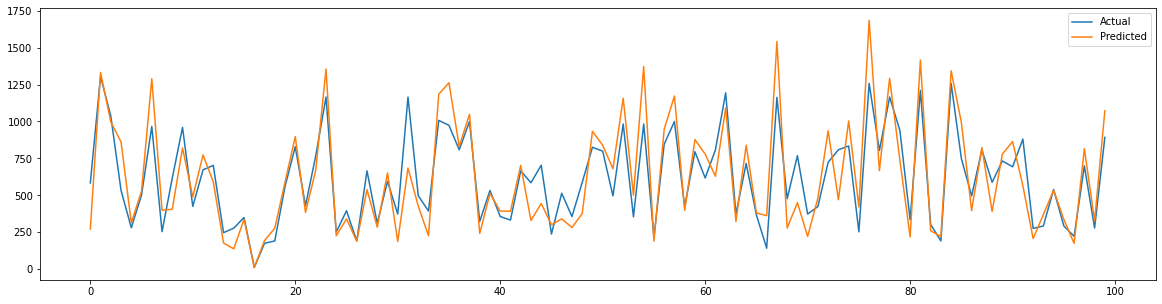

In [49]:
#Plotting actual and predicted values for train data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_train)[:100])
plt.plot(np.array(10**(y_train))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

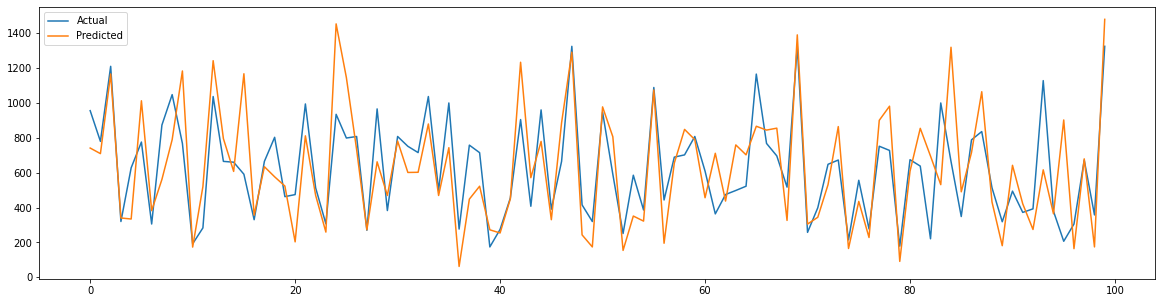

In [50]:
#Plotting actual and predicted values for test data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_test)[:100])
plt.plot(np.array(10**(y_test))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

Text(0.5, 1.0, 'Error plot')

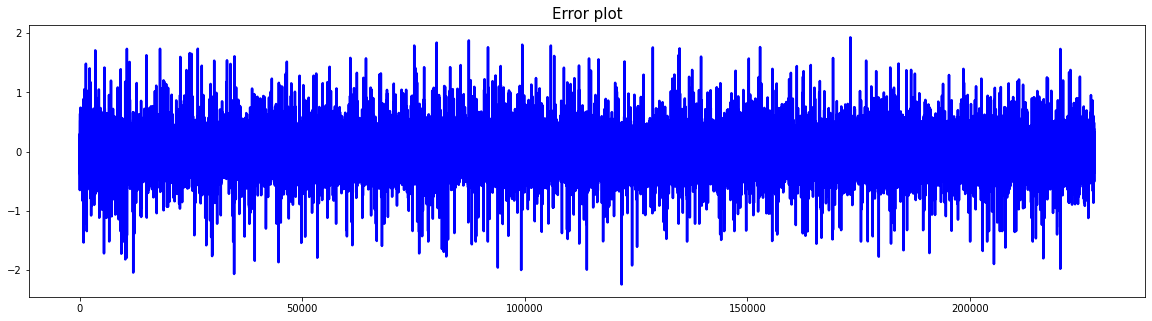

In [51]:
#plotting the error
plt.figure(figsize=(20,5))
c= [i for i in range(0, len(y_test))]

plt.plot(c, y_test-y_pred_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error plot', fontsize=15)

In [52]:
dt_best.feature_importances_

array([1.01015270e-02, 1.04780136e-03, 1.08852573e-02, 6.79485021e-03,
       1.59280815e-02, 4.84240127e-02, 0.00000000e+00, 8.14673112e-01,
       9.88926804e-04, 6.58159648e-02, 5.37941224e-06, 4.89817819e-05,
       9.72802481e-05, 3.67587480e-05, 1.27473819e-04, 1.99130498e-03,
       8.04686366e-03, 1.18115247e-02, 2.26244007e-05, 6.02705704e-04,
       2.41046692e-04, 1.65674040e-03, 6.51781345e-04])

In [61]:
importances = dt_best.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [69]:
importance_df.sort_values('Feature Importance',ascending=False,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

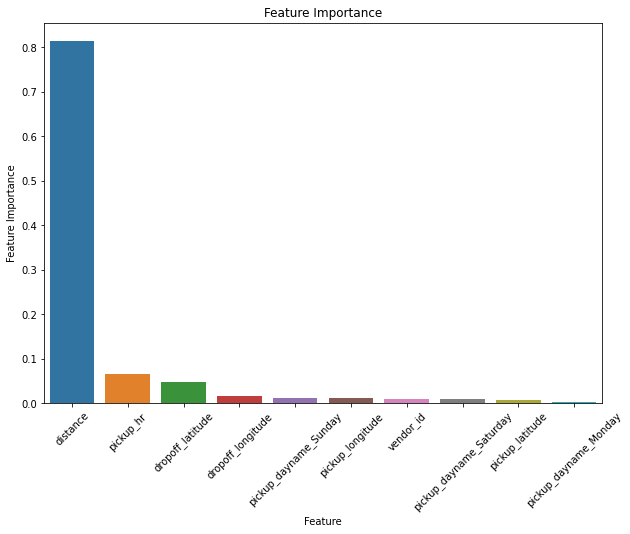

In [76]:
plt.figure(figsize=(10,7))
sns.barplot(data=importance_df[:10], y='Feature Importance',x='Feature')
plt.title('Feature Importance')
plt.xticks(rotation=45)

# **REGULARIZED LINEAR REGRESSON- LASSO**

In [35]:
#importing Lasso Regressor
from sklearn.linear_model import Lasso

In [36]:
#performing cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-12,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,75,100]}
lasso_regressor =HalvingGridSearchCV(lasso, parameters, scoring='r2', cv=5,n_jobs=-1)
lasso_regressor.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Lasso(), n_jobs=-1,
                    param_grid={'alpha': [1e-15, 1e-12, 1e-10, 1e-08, 1e-05,
                                          0.0001, 0.001, 0.01, 0.1, 1, 5, 10,
                                          20, 30, 40, 45, 50, 55, 75, 100]},
                    scoring='r2')

In [37]:
print(f'The best parameters for lasso regression are: {lasso_regressor.best_params_}')
print(f'The r2 score obtained from these parameters is: {lasso_regressor.best_score_}')

The best parameters for lasso regression are: {'alpha': 1e-10}
The r2 score obtained from these parameters is: 0.40997517347163315


In [38]:
#predicting the values
y_pred_train = lasso_regressor.predict(X_train)
y_pred_test = lasso_regressor.predict(X_test)

In [41]:
# for train data
lasso_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , lasso_train_mse)

lasso_train_rmse = lasso_train_mse**0.5

print("Train RMSE :" ,lasso_train_rmse)

lasso_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,lasso_train_r2) 

lasso_train_r2_adj = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lasso_train_r2_adj)

lasso_train_mae  = mean_absolute_error((y_train), (y_pred_train))
print("Train MAE :" , lasso_train_mae)

Train MSE : 0.05708845307555185
Train RMSE : 0.23893190049792817
Train R2 : 0.4100153240556971
Train Adjusted R2 :  0.4100014868378692
Train MAE : 0.1767784587566795


In [42]:
#for test data
lasso_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , lasso_test_mse)

lasso_test_rmse = lasso_test_mse**0.5
print("Test RMSE :" ,lasso_test_rmse)

lasso_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_adj = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lasso_test_r2_adj)

lasso_test_mae  = mean_absolute_error((y_test), (y_pred_test))
print("Test Mae :" , lasso_test_mae)

Test MSE : 0.05721956336823891
Test RMSE : 0.23920611064151123
Test R2 : 0.41006266051734475
Test Adjusted R2 :  0.41000731207963326
Test Mae : 0.17694680846691058


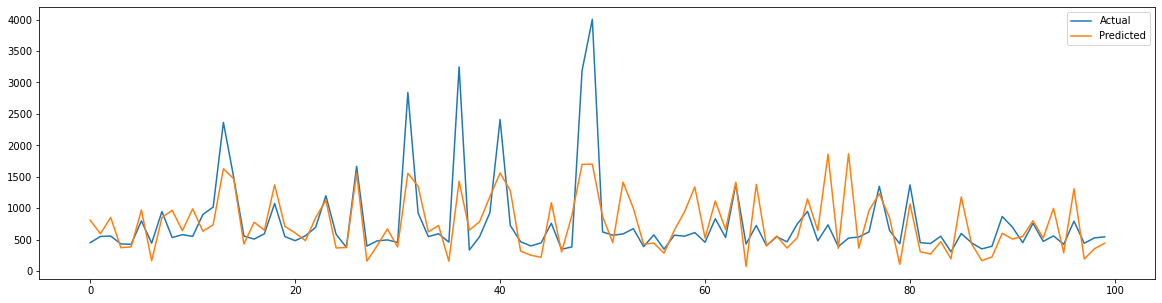

In [43]:
#Plotting actual and predicted values for train data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_train)[:100])
plt.plot(np.array(10**(y_train))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

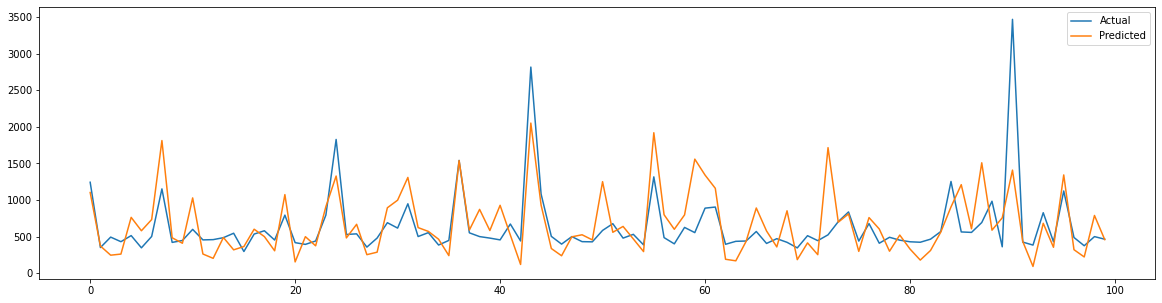

In [44]:
#Plotting actual and predicted values for test data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_test)[:100])
plt.plot(np.array(10**(y_test))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

In [ ]:
#plotting the error
plt.figure(figsize=(20,5))
c= [i for i in range(0, len(y_test))]

plt.plot(c, y_test-y_pred_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error plot', fontsize=15)

# **REGULARIZED LINEAR REGRESSON- RIDGE**

In [60]:
#importing Ridge Regression
from sklearn.linear_model import Ridge

In [62]:
#Performing Cross Validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-12,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,75,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5,n_jobs=-1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-15, 1e-12, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 75, 100]},
             scoring='r2')

In [65]:
print(f'The best parameters for ridge regression is: {ridge_regressor.best_params_}')
print(f'The r2 score obtained using the above parameter is: {ridge_regressor.best_score_}')


The best parameters for ridge regression is: {'alpha': 1}
The r2 score obtained using the above parameter is: 0.4430697958491388


In [66]:
#Predicting the values
y_pred_train = ridge_regressor.predict(X_train)
y_pred_test = ridge_regressor.predict(X_test)

In [67]:
# for train data
ridge_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , ridge_train_mse)

ridge_train_rmse = ridge_train_mse**0.5

print("Train RMSE :" ,ridge_train_rmse)

ridge_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,ridge_train_r2) 

ridge_train_r2_adj = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",ridge_train_r2_adj)

ridge_train_mae  = mean_absolute_error((y_train), (y_pred_train))
print("Train MAE :" , ridge_train_mae)

Train MSE : 0.04932023157583132
Train RMSE : 0.22208158765604888
Train R2 : 0.443111661227207
Train Adjusted R2 :  0.44309761056205876
Train MAE : 0.16469559052124447


In [68]:
#for test data
ridge_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , ridge_test_mse)

ridge_test_rmse = ridge_test_mse**0.5

print("Test RMSE :" ,ridge_test_rmse)

ridge_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_adj = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",ridge_test_r2_adj)

ridge_test_mae  = mean_absolute_error((y_test), (y_pred_test))
print("Test Mae :" , ridge_test_mae)

Test MSE : 0.04971509769033181
Test RMSE : 0.22296882672322563
Test R2 : 0.4431514724358535
Test Adjusted R2 :  0.44309526953900435
Test Mae : 0.1649450065140476


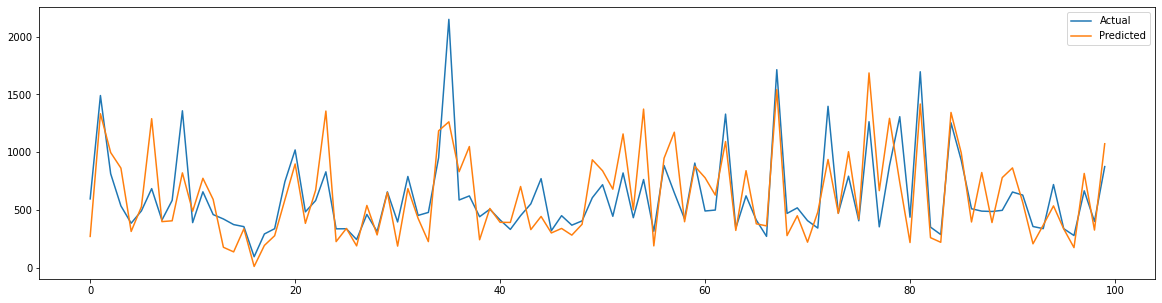

In [69]:
#Plotting actual and predicted values for train data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_train)[:100])
plt.plot(np.array(10**(y_train))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

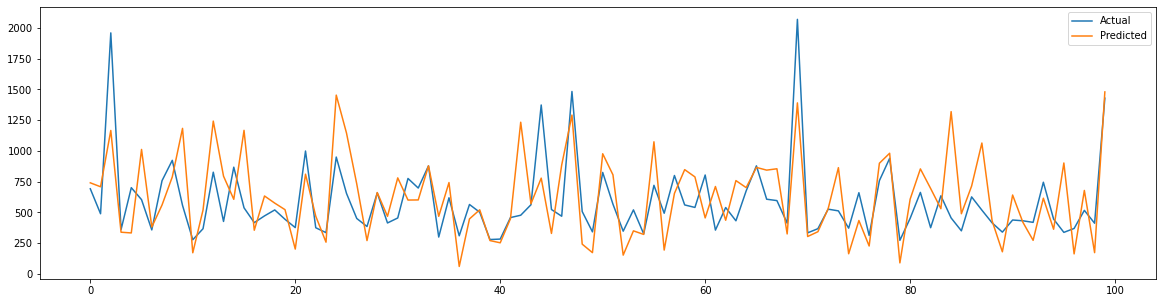

In [70]:
#Plotting actual and predicted values for test data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_test)[:100])
plt.plot(np.array(10**(y_test))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

Text(0.5, 1.0, 'Error plot')

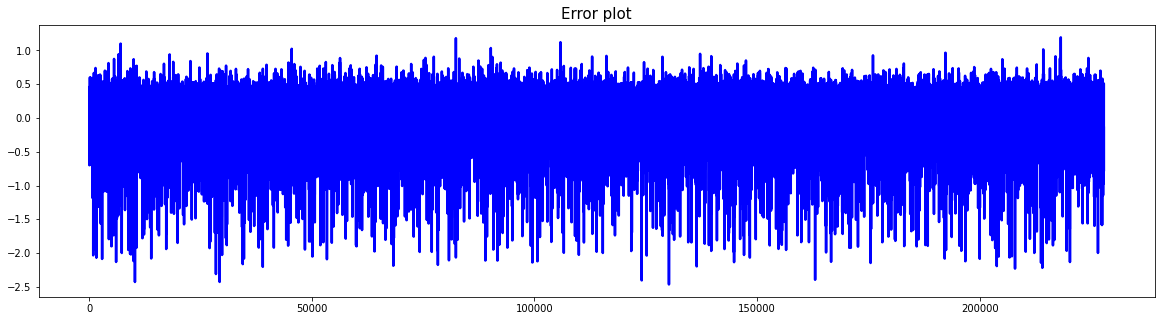

In [71]:
# plotting the error
plt.figure(figsize=(20,5))
c= [i for i in range(0, len(y_test))]

plt.plot(c, y_test-y_pred_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error plot', fontsize=15)

# **Xgboost**

In [45]:
import xgboost as xgb

In [46]:
# No of estimators
n_estimators = [80,100]
 
# Maximum depth of trees
max_depth = [6,10]
min_samples_split = [40,50]
learning_rate=[0.1,0.2,0.4]
 
# Hyperparameter Grid
xgb_params = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_' : min_samples_split,
             'learning_rate' : learning_rate
             }


In [47]:
xgb = xgb.XGBRegressor(tree_method = 'hist',silent=1)

In [49]:
xgb_grid = HalvingGridSearchCV(estimator=xgb,
                        param_grid = xgb_params,
                        cv = 3, verbose=1,
                        scoring="r2",n_jobs=-1)

In [50]:
xgb_grid.fit(X_train,y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 108965
max_resources_: 980687
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 24
n_resources: 108965
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 1
n_candidates: 8
n_resources: 326895
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 2
n_candidates: 3
n_resources: 980685
Fitting 3 folds for each of 3 candidates, totalling 9 fits


HalvingGridSearchCV(cv=3, estimator=XGBRegressor(silent=1, tree_method='hist'),
                    n_jobs=-1,
                    param_grid={'learning_rate': [0.1, 0.2, 0.4],
                                'max_depth': [6, 10], 'min_samples_': [40, 50],
                                'n_estimators': [80, 100]},
                    scoring='r2', verbose=1)

In [40]:
xgb_grid.score(X_train,y_train)

0.8173124761887547

In [79]:
best=xgb_grid.best_params_

In [81]:
best

{'learning_rate': 0.2,
 'max_depth': 10,
 'min_samples_': 40,
 'n_estimators': 100}

In [80]:
best_params={'learning_rate': [0.2],
 'max_depth': [10],
 'min_samples_': [40],
 'n_estimators': [100]}

In [53]:
from sklearn.model_selection import GridSearchCV

In [72]:
xgb_grid = GridSearchCV(estimator=xgb,
                        param_grid = best_params,
                        cv = 3, verbose=1,
                        scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=XGBRegressor(silent=1, tree_method='hist'),
             param_grid={'learning_rate': [0.2], 'max_depth': [10],
                         'min_samples_': [40], 'n_estimators': [100]},
             scoring='r2', verbose=1)

In [59]:
xgb_grid.score(X_train,y_train)

0.8358333290454802

In [73]:
y_pred_train = xgb_grid.predict(X_train)
y_pred_test = xgb_grid.predict(X_test)

In [74]:
xgb_grid.score(X_test, y_test)

0.7636913819704834

In [75]:
# for train data
xgb_train_mse  = mean_squared_error((y_train), (y_pred_train))
print("Train MSE :" , xgb_train_mse)

xgb_train_rmse = xgb_train_mse**0.5

print("Train RMSE :" ,xgb_train_rmse)

xgb_train_r2 = r2_score((y_train), (y_pred_train))
print("Train R2 :" ,xgb_train_r2) 

xgb_train_r2_adj = 1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",xgb_train_r2_adj)

xgb_train_mae  = mean_absolute_error((y_train), (y_pred_train))
print("Train MAE :" , xgb_train_mae)

Train MSE : 0.01588519443552703
Train RMSE : 0.12603648057418546
Train R2 : 0.8358333290454802
Train Adjusted R2 :  0.8358294787590598
Train MAE : 0.0911367399122644


In [63]:
#for test data
xgb_test_mse  = mean_squared_error((y_test), (y_pred_test))
print("Test MSE :" , xgb_test_mse)

xgb_test_rmse = xgb_test_mse**0.5

print("Test RMSE :" ,xgb_test_rmse)

xgb_test_r2 = r2_score((y_test), (y_pred_test))
print("Test R2 :" ,xgb_test_r2)

xgb_test_r2_adj = 1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",xgb_test_r2_adj)

xgb_test_mae  = mean_absolute_error((y_test), (y_pred_test))
print("Test Mae :" , xgb_test_mae)

Test MSE : 0.022920190058928175
Test RMSE : 0.15139415463923359
Test R2 : 0.7636913819704834
Test Adjusted R2 :  0.7636692112890392
Test Mae : 0.10161614752739712


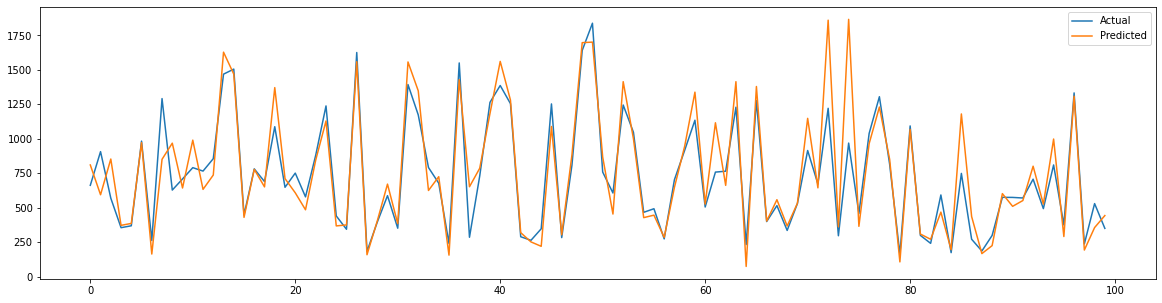

In [64]:
#Plotting actual and predicted values for train data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_train)[:100])
plt.plot(np.array(10**(y_train))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

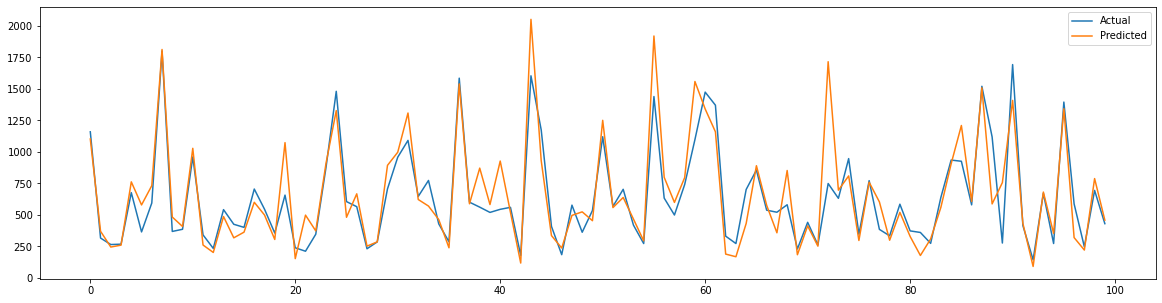

In [65]:
#Plotting actual and predicted values for test data
plt.figure(figsize=(20,5))
plt.plot(10**(y_pred_test)[:100])
plt.plot(np.array(10**(y_test))[:100])
plt.legend(["Actual","Predicted"])
plt.show()

Text(0.5, 1.0, 'Error plot')

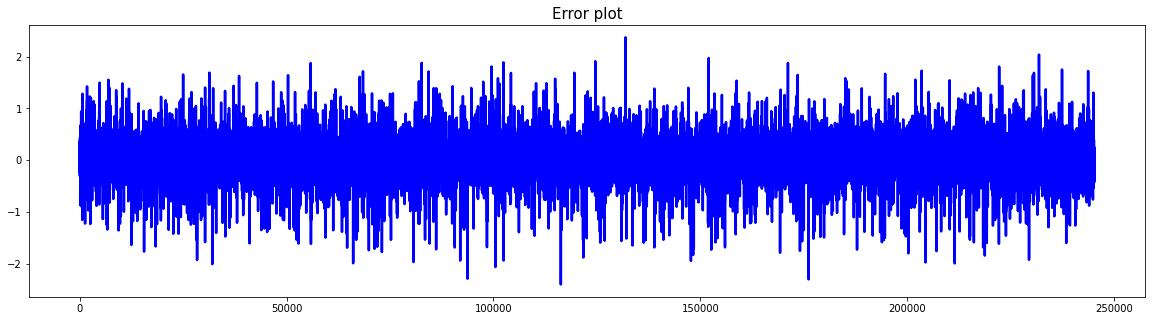

In [66]:
# plotting the error
plt.figure(figsize=(20,5))
c= [i for i in range(0, len(y_test))]

plt.plot(c, y_test-y_pred_test, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error plot', fontsize=15)

In [77]:
best_xgb=xgb_grid.best_estimator_

In [83]:
best_xgb.feature_importances_

array([0.03623155, 0.01232523, 0.01855376, 0.01873301, 0.02140047,
       0.03624837, 0.01210605, 0.46013507, 0.01275038, 0.05994896,
       0.01528399, 0.01550533, 0.01788015, 0.01494055, 0.01680865,
       0.03703937, 0.0544463 , 0.07010432, 0.0151563 , 0.01696085,
       0.01624498, 0.01078769, 0.01040869], dtype=float32)

In [84]:
importances = best_xgb.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [86]:
importance_df.sort_values('Feature Importance',ascending=False,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

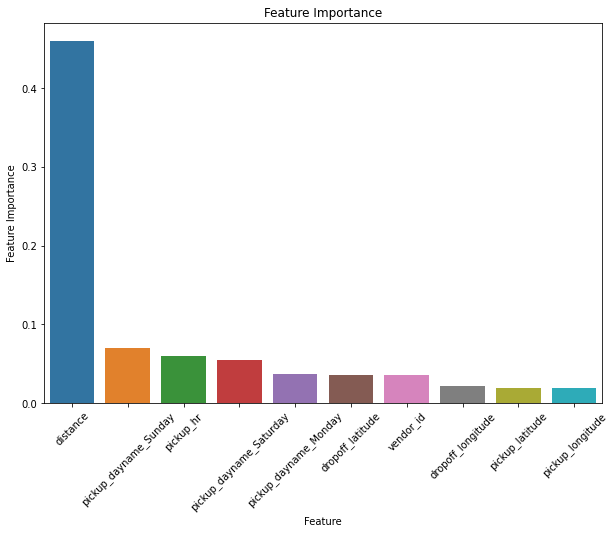

In [88]:
plt.figure(figsize=(10,7))
sns.barplot(data=importance_df[:10], y='Feature Importance',x='Feature')
plt.title('Feature Importance')
plt.xticks(rotation=45)